### Requests

This is a markdown chunk.

In [1]:
import requests

response = requests.get('https://xkcd.com/869')


In [4]:
from bs4 import BeautifulSoup

doc = BeautifulSoup(response.text, 'lxml')
print('\n'.join(
    doc.prettify().splitlines()[0:10]
    ))

<!DOCTYPE html>
<html>
 <head>
  <link href="/s/b0dcca.css" rel="stylesheet" title="Default" type="text/css"/>
  <title>
   xkcd: Server Attention Span
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <link href="/s/919f27.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/s/919f27.ico" rel="icon" type="image/x-icon"/>


In [7]:
img = doc.select_one('#comic > img')
img['title']

"They have to keep the adjacent rack units empty. Otherwise, half the entries in their /var/log/syslog are just 'SERVER BELOW TRYING TO START CONVERSATION *AGAIN*.' and 'WISH THEY'D STOP GIVING HIM SO MUCH COFFEE IT SPLATTERS EVERYWHERE.'"

### HTML Table

In [8]:
import pandas as pd

vars = (
    pd
    .read_html('https://api.census.gov/data/2017/acs/acs5/variables.html')
    .pop()
)
vars.head()

,Name,Label,Concept,Required,Attributes,Limit,Predicate Type,Group,Unnamed: 8
0,AIANHH,Geography,NaN,not required,NaN,0,(not a predicate),NaN,NaN
1,AIHHTL,Geography,NaN,not required,NaN,0,(not a predicate),NaN,NaN
2,AIRES,Geography,NaN,not required,NaN,0,(not a predicate),NaN,NaN
3,ANRC,Geography,NaN,not required,NaN,0,(not a predicate),NaN,NaN
4,B00001_001E,Estimate!!Total,UNWEIGHTED SAMPLE COUNT OF THE POPULATION,not required,B00001_001EA,0,int,B00001,NaN


In [11]:
idx = (
    vars['Label']
    .str
    .contains(
        'Median household income',
        na = False,
        )
    )
vars.loc[idx, ['Name', 'Label']]

,Name,Label
11214,B19013_001E,Estimate!!Median household income in the past ...
11215,B19013A_001E,Estimate!!Median household income in the past ...
11216,B19013B_001E,Estimate!!Median household income in the past ...
11217,B19013C_001E,Estimate!!Median household income in the past ...
11218,B19013D_001E,Estimate!!Median household income in the past ...
11219,B19013E_001E,Estimate!!Median household income in the past ...
11220,B19013F_001E,Estimate!!Median household income in the past ...
11221,B19013G_001E,Estimate!!Median household income in the past ...
11222,B19013H_001E,Estimate!!Median household income in the past ...
11223,B19013I_001E,Estimate!!Median household income in the past ...


### Web Services

In [13]:
path = 'https://api.census.gov/data/2017/acs/acs5'

query = {
  'get': 'NAME,B19013_001E',
  'for': 'tract:*',
  'in': 'state:24',
}
response = requests.get(path, params=query)
response

<Response [200]>

In [15]:
response.headers['Content-Type']

'application/json;charset=utf-8'

In [16]:
data = pd.read_json(response.content)
data

,0,1,2,3,4
0,NAME,B19013_001E,state,county,tract
1,"Census Tract 105.01, Wicomico County, Maryland",68652,24,045,010501
2,"Census Tract 5010.02, Carroll County, Maryland",75069,24,013,501002
3,"Census Tract 5077.04, Carroll County, Maryland",88306,24,013,507704
4,"Census Tract 5061.02, Carroll County, Maryland",84810,24,013,506102
5,"Census Tract 5061.01, Carroll County, Maryland",95075,24,013,506101
6,"Census Tract 5052.06, Carroll County, Maryland",91908,24,013,505206
7,"Census Tract 5052.08, Carroll County, Maryland",106116,24,013,505208
8,"Census Tract 5081.02, Carroll County, Maryland",76083,24,013,508102
9,"Census Tract 5081.01, Carroll County, Maryland",84821,24,013,508101


### Specialized Packages

In [17]:
from census import Census

key = None
c = Census(key, year=2017)
c.acs5

In [18]:
variables = ('NAME', 'B19013_001E')

In [19]:
response = c.acs5.state_county_tract(
    variables,
    state_fips='24',
    county_fips=Census.ALL,
    tract=Census.ALL)
response[0]

{'B19013_001E': 68652.0,
 'NAME': 'Census Tract 105.01, Wicomico County, Maryland',
 'county': '045',
 'state': '24',
 'tract': '010501'}

In [20]:
df = (
  pd
  .DataFrame(response)
  .query("B19013_001E >= 0")
)

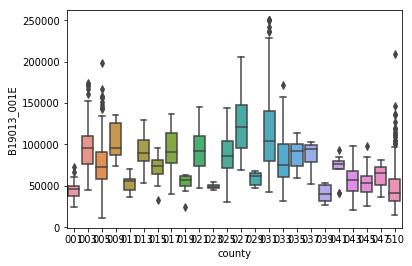

In [24]:
import seaborn as sns

sns.boxplot(
  data = df,
  x = 'county',
  y = 'B19013_001E',
)

### Paging & Stashing

You would need your own API key saved in a api_key.py file like this
```
API_KEY = 'your_key'
```

In [26]:
%run api_key.py

In [32]:
import requests

api = 'https://api.data.gov/regulations/v3/'
path = 'document.json'
query = {
    'documentId':'DOI-2017-0002-0001',
    'api_key':API_KEY,
    }
doc = (
    requests
    .get(api + path, params=query)
    .json()
)

In [35]:
query = {
    'dktid': doc['docketId']['value'],
    'dct': 'PS',
    'api_key': API_KEY,
    }
path = 'documents.json'
response = requests.get(api + path, params=query)
dkt = response.json()

In [38]:
from schema import Session, Comment

session = Session()
engine = session.bind

In [40]:
query['rpp'] = 10

In [41]:
table = Comment.metadata.tables['comment']
for i in range(0, 15):
    
    # advance page and query
    query['po'] = i * query['rpp']
    response = requests.get(api + path, params=query)
    page = response.json()
    docs = page['documents']
    
    # save page with session engine
    values = [{'comment': doc['commentText']} for doc in docs]
    insert = table.insert().values(values)
    engine.execute(insert)


In [42]:
df = pd.read_sql_table('comment', engine)

In [44]:
engine.dispose()